In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:

train_images=train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
train_images.shape

(60000, 784)

In [4]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))


In [5]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [6]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
output = model.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2559 - accuracy: 0.9253
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1038 - accuracy: 0.9695
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0369 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - accuracy

In [8]:
test_loss, test_acc = output.model.evaluate(test_images,test_labels)
print()

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9803



MNIST with CNN

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1982528   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 2,038,922
Trainable params: 2,038,922
Non-trainable params: 0
____________________________________________

In [13]:
train_images = train_images.reshape(-1,28,28,1)
# train_labels = train_labels.reshape(-1,28,28,1)

In [14]:
train_labels.shape

(60000, 10)

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 310s 330ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 2/5
938/938 [==============================] - 310s 330ms/step - loss: 0.0082 - accuracy: 0.9979
Epoch 3/5
938/938 [==============================] - 307s 327ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 4/5
938/938 [==============================] - 307s 327ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 5/5
938/938 [==============================] - 306s 327ms/step - loss: 0.0039 - accuracy: 0.9991


# fashion_mnist

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

In [27]:
train_images.shape

(60000, 28, 28)

4


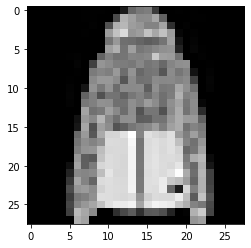

In [29]:
plt.imshow(train_images[22],cmap = 'gray')
print(train_labels[22])

In [30]:
train_images=train_images.reshape(60000,784)

In [31]:
train_labels = train_labels.reshape(-1,1)

In [33]:
from keras.layers import Dense
net = models.Sequential([
                         Dense(64,input_dim = 784, activation = 'relu'),
                         Dense(32, activation = 'relu'),
                         Dense(10,activation = 'softmax')
])

In [36]:
net.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
out_net = net.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5283 - accuracy: 0.8111
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3894 - accuracy: 0.8611
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8734
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3361 - accuracy: 0.8793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3242 - accuracy: 0.8833
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8861
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.8916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3063 - accuracy: 0.8933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8943
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.297

In [38]:
test_images.shape

(10000, 28, 28)

In [40]:
# test_images=test_images.reshape(-1,784)

In [41]:
test_loss, test_acc = net.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8780


In [44]:
train_images = train_images.reshape(-1,28,28,1)

In [51]:
from keras.layers import Dense,Conv2D,Flatten

In [52]:
f_cnn_model = models.Sequential([
              Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
              Conv2D(64, (3, 3), activation='relu'),
              Conv2D(64, (3, 3), activation='relu'),
              Flatten(),
              Dense(64, activation='relu'),
              Dense(10, activation='softmax')
])

In [54]:
f_cnn_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
f_output = f_cnn_model.fit(train_images,train_labels,epochs=5,batch_size=60)

Epoch 1/5
1000/1000 [==============================] - 307s 307ms/step - loss: 0.2201 - accuracy: 0.9196
Epoch 2/5
1000/1000 [==============================] - 307s 307ms/step - loss: 0.1703 - accuracy: 0.9392
Epoch 3/5
1000/1000 [==============================] - 307s 307ms/step - loss: 0.1361 - accuracy: 0.9517
Epoch 4/5
1000/1000 [==============================] - 306s 306ms/step - loss: 0.1082 - accuracy: 0.9626
Epoch 5/5
1000/1000 [==============================] - 306s 306ms/step - loss: 0.0856 - accuracy: 0.9699


In [64]:
test_images = test_images.reshape(-1,28,28,1)

In [65]:
test_images.shape

(10000, 28, 28, 1)

In [67]:
test_loss, test_acc = f_cnn_model.evaluate(test_images,test_labels)

313/313 [==============================] - 35s 113ms/step - loss: 0.2961 - accuracy: 0.9201


# cfar 10

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

In [8]:
train_images.shape

(50000, 32, 32, 3)

In [9]:
train_images = train_images.reshape(50000,32*32*3)

In [10]:
train_images.shape

(50000, 3072)

In [11]:
train_labels.shape

(50000, 1)

In [12]:
cfar_net = models.Sequential([
                         Dense(64,input_dim = 3072, activation = 'relu'),
                         Dense(32, activation = 'relu'),
                         Dense(10,activation = 'softmax')
])

In [13]:
cfar_net.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
cfar_out = cfar_net.fit(train_images,train_labels,epochs=10, batch_size=50)

Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 1.9776 - accuracy: 0.2803
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.7908 - accuracy: 0.3610
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.7301 - accuracy: 0.3829
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6905 - accuracy: 0.3978
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6583 - accuracy: 0.4093
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6384 - accuracy: 0.4163
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6218 - accuracy: 0.4194
Epoch 8/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6103 - accuracy: 0.4259
Epoch 9/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6007 - accuracy: 0.4294
Epoch 10/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.591

In [16]:
test_images.shape

(10000, 32, 32, 3)

In [17]:
test_images = test_images.reshape(10000,3072)

In [18]:
test_loss, test_acc = cfar_net.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6278 - accuracy: 0.4192


In [23]:
train_images = train_images.reshape(50000,32,32,3)

In [32]:
from keras.layers import Dense,Conv2D,Flatten
cfar_cnn_model = models.Sequential([
              Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
              Conv2D(64, (3, 3), activation='relu'),
              Conv2D(64, (3, 3), activation='relu'),
              Flatten(),
              Dense(64, activation='relu'),
              Dense(10, activation='softmax')
])

In [33]:
cfar_cnn_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_images.shape

(50000, 32, 32, 3)

In [35]:
train_labels.shape

(50000, 1)

In [36]:
cfar_cnn_output = cfar_cnn_model.fit(train_images,train_labels,epochs=5,batch_size=60)

Epoch 1/5
834/834 [==============================] - 354s 423ms/step - loss: 1.5325 - accuracy: 0.4671
Epoch 2/5
834/834 [==============================] - 354s 425ms/step - loss: 1.0123 - accuracy: 0.6475
Epoch 3/5
834/834 [==============================] - 354s 424ms/step - loss: 0.7911 - accuracy: 0.7244
Epoch 4/5
834/834 [==============================] - 353s 423ms/step - loss: 0.6065 - accuracy: 0.7913
Epoch 5/5
834/834 [==============================] - 354s 424ms/step - loss: 0.4334 - accuracy: 0.8531


In [44]:
test_images.shape

(10000, 32, 32, 3)

In [45]:
test_loss, test_acc = cfar_cnn_model.evaluate(test_images,test_labels)

313/313 [==============================] - 20s 62ms/step - loss: 1.3556 - accuracy: 0.6499


# cfar 100

In [46]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

169017344/169001437 [==============================] - 2s 0us/step


In [47]:
train_images.shape

(50000, 32, 32, 3)

In [53]:
train_images = train_images.reshape(-1,3072)

In [54]:
train_labels.shape

(50000, 1)

In [58]:
cfar100_net = models.Sequential([
                         Dense(64,input_dim = 3072, activation = 'relu'),
                         Dense(32, activation = 'relu'),
                         Dense(100,activation = 'softmax')
])

In [65]:
cfar100_net.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
cfar100_output = cfar100_net.fit(train_images,train_labels,epochs=10,batch_size=50)

Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.4489 - accuracy: 0.1736
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.4421 - accuracy: 0.1759
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.4420 - accuracy: 0.1744
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.4395 - accuracy: 0.1752
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.4365 - accuracy: 0.1758
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.4330 - accuracy: 0.1763
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.4367 - accuracy: 0.1759
Epoch 8/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.4349 - accuracy: 0.1772
Epoch 9/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.4352 - accuracy: 0.1761
Epoch 10/10
1000/1000 [==============================] - 5s 5ms/step - loss: 3.433

In [68]:
test_images.shape

(10000, 32, 32, 3)

In [69]:
test_images = test_images.reshape(10000,3072)

In [70]:
test_loss, test_acc = cfar100_net.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 3.5207 - accuracy: 0.1702


# cfar100_cnn

In [71]:
train_images =train_images.reshape(-1,32,32,3)

In [72]:
test_images = test_images.reshape(-1,32,32,3)

In [74]:
from keras.layers import Dense,Conv2D,Flatten
cfar100_cnn_model = models.Sequential([
              Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
              Conv2D(64, (3, 3), activation='relu'),
              Conv2D(64, (3, 3), activation='relu'),
              Flatten(),
              Dense(64, activation='relu'),
              Dense(100, activation='softmax')
])

In [76]:
cfar100_cnn_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
cfar100_cnn_output = cfar100_cnn_model.fit(train_images,train_labels,epochs=5,batch_size=50)

Epoch 1/5
1000/1000 [==============================] - 361s 361ms/step - loss: 3.6347 - accuracy: 0.1593
Epoch 2/5
1000/1000 [==============================] - 364s 364ms/step - loss: 2.8535 - accuracy: 0.2983
Epoch 3/5
1000/1000 [==============================] - 361s 361ms/step - loss: 2.3470 - accuracy: 0.3989
Epoch 4/5
1000/1000 [==============================] - 362s 362ms/step - loss: 1.8898 - accuracy: 0.5007
Epoch 5/5
1000/1000 [==============================] - 367s 367ms/step - loss: 1.4029 - accuracy: 0.6176


In [79]:
test_loss, test_acc = cfar100_cnn_model.evaluate(test_images,test_labels)

313/313 [==============================] - 20s 62ms/step - loss: 3.4834 - accuracy: 0.2946
